In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

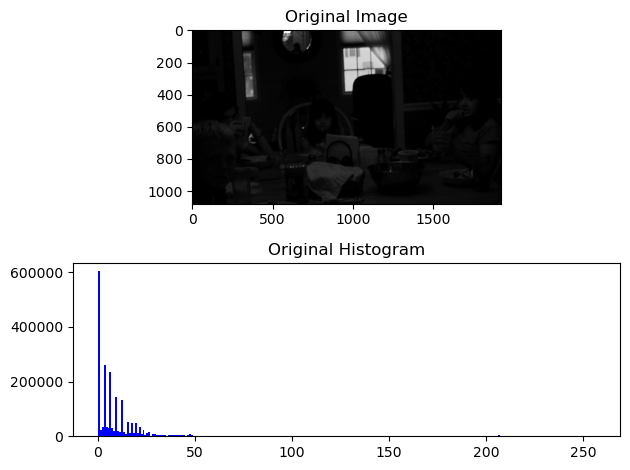

In [19]:
path = "C:/Users/efecankuloglu/Desktop/Sayisal_Goruntu_Isleme/Odev/goruntu3.png"
img = cv2.imread(path,0)

fig, ((ax_img, ax_img_hist)) = plt.subplots(nrows=2, ncols=1)

ax_img.imshow(img, cmap=plt.cm.gray)
ax_img.set_title('Original Image')

ax_img_hist.hist(img.flatten(),256,[0,256], color = 'b')
ax_img_hist.set_title("Original Histogram")

plt.tight_layout()
plt.show()

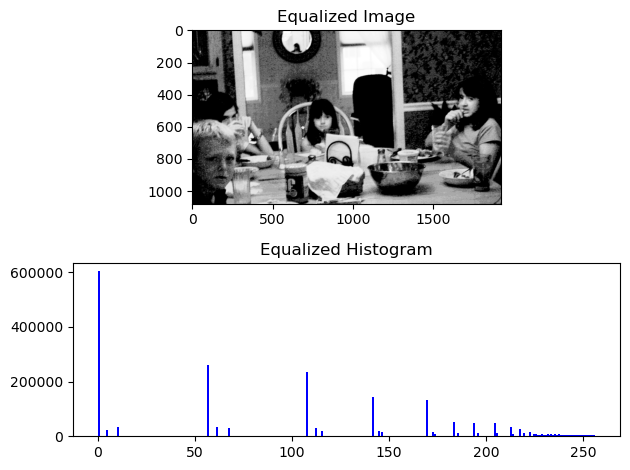

In [10]:
equalized = cv2.equalizeHist(img)

fig, ((ax_global, ax_global_hist)) = plt.subplots(nrows=2, ncols=1)

ax_global.imshow(equalized, cmap=plt.cm.gray)
ax_global.set_title('Equalized Image')

ax_global_hist.hist(equalized.flatten(),256,[0,256], color = 'b')
ax_global_hist.set_title("Equalized Histogram")

plt.tight_layout()
plt.show()

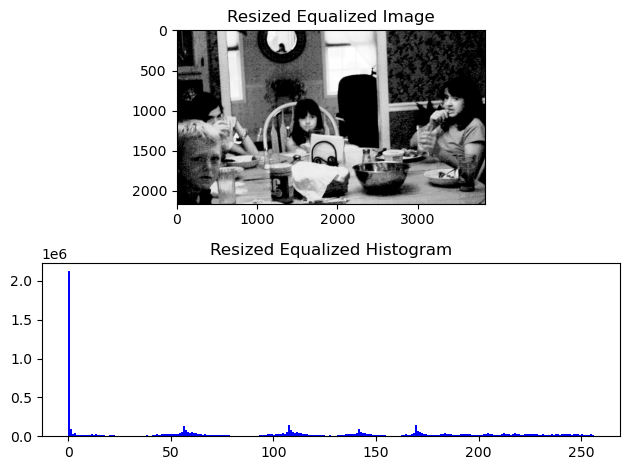

In [12]:
resized_equalized = cv2.resize(equalized,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

fig, ((ax_res_equ, ax_res_equ_hist)) = plt.subplots(nrows=2, ncols=1)


ax_res_equ.imshow(resized_equalized, cmap=plt.cm.gray)
ax_res_equ.set_title('Resized Equalized Image')

ax_res_equ_hist.hist(resized_equalized.flatten(),256,[0,256], color = 'b')
ax_res_equ_hist.set_title("Resized Equalized Histogram")

plt.tight_layout()
plt.show()

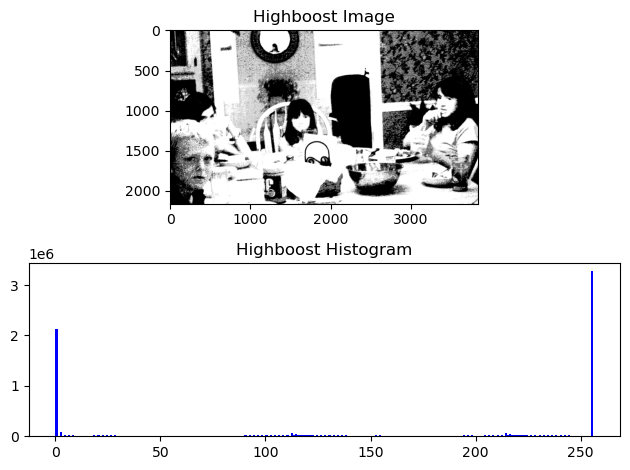

In [13]:
img_blurred = cv2.GaussianBlur(resized_equalized, (19,19), 0)

mask = cv2.addWeighted(resized_equalized, 1, img_blurred, -1, 0)

unsharp = cv2.addWeighted(resized_equalized, 2, mask, 1, 0)


fig, ((ax_highboost, ax_unsharp_hist)) = plt.subplots(nrows=2, ncols=1)

ax_highboost.imshow(unsharp, cmap=plt.cm.gray)
ax_highboost.set_title('Highboost Image')

ax_unsharp_hist.hist(unsharp.flatten(),256,[0,256], color = 'b')
ax_unsharp_hist.set_title("Highboost Histogram")

plt.tight_layout()
plt.show()

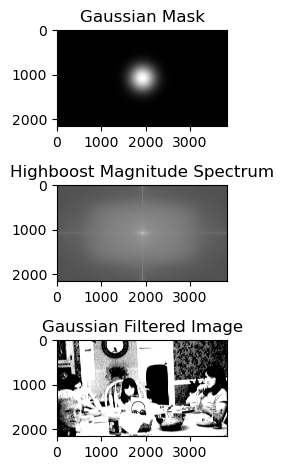

In [16]:
row, col = unsharp.shape

I = cv2.dft(np.float32(unsharp),flags = cv2.DFT_COMPLEX_OUTPUT)
I_shift = np.fft.fftshift(I)

magnitude_spectrum = 20*np.log(cv2.magnitude(I_shift[:,:,0],I_shift[:,:,1]))
D0=200

H=[[math.exp(-((i-col/2)**2+(j-row/2)**2)/(2*D0**2)) for i in range(col)] for j in range(row)]
# H=[[(np.sqrt((i-col/2)**2+(j-row/2)**2)<D0) for i in range(col)] for j in range(row)]

If=np.zeros((row,col,2))


If[:,:,0]=I_shift[:,:,0]*H
If[:,:,1]=I_shift[:,:,1]*H

f_ishift = np.fft.ifftshift(If)
img_back = cv2.idft(f_ishift)

fig, ((ax_gaussian_mask, ax_magnitude, ax_filtered_img)) = plt.subplots(nrows=3, ncols=1)

ax_gaussian_mask.imshow(H, cmap=plt.cm.gray)
ax_gaussian_mask.set_title('Gaussian Mask')

ax_magnitude.imshow(magnitude_spectrum, cmap=plt.cm.gray)
ax_magnitude.set_title('Highboost Magnitude Spectrum')

ax_filtered_img.imshow(img_back[:,:,0], cmap=plt.cm.gray)
ax_filtered_img.set_title('Gaussian Filtered Image')

plt.tight_layout()
plt.show()